## Exploring humanitarian needs in COVID vaccine distribution: Spotlight on gendered vulnerability

This notebook explores the relationship between gendered vulnerabilities to COVID and COVID vaccine distribution in countries of humanitarian interest. In understanding gendered vulnerabilities, we are largely relying on the data compiled as part of a report on ["Understanding Women’s and Girls’ Vulnerabilities to the COVID-19 Pandemic"](https://data2x.org/wp-content/uploads/2020/11/COVID-19-Vulnerability-Paper_FINAL.pdf) (Buvinic, Noe, and Swanson; 2020) from [data2x](https://data2x.org/) and [Open Data Watch](https://opendatawatch.com/) (ODW). We have two datasets on vaccine distribution, both accessed via HDX: [vaccine doses distributed per 100 people](https://data.humdata.org/dataset/covid-19-vaccinations#) and [vaccine forecasts and deliveries in HRP countries](https://data.humdata.org/dataset/covid-19-vaccine-doses-in-hrp-countries). 

This work hopes to contribute to the conversation on equitable vaccine distribution around the world.

In [109]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df_vac_hrp = pd.read_csv('data/ocha-doses.csv')
df_vac_hrp = df_vac_hrp.drop([0]).reset_index()
df_vac_owid = pd.read_csv('data/owid-data.csv')
df_vac_owid = df_vac_owid.drop([0]).reset_index()
df_gen = pd.read_excel('data/EDITED-COVID-19-Gender-Vulnerability-Data-Dashboard-by-ODW.xlsx', sheet_name=1, engine='openpyxl', header=2)

The datasets from Buvinic, Noe, and Swanson (2020) compiles the following composite womens' vulnerability indicators: 

- Women's health
- Economic wellbeing
- Human capital

All indicators are rescaled to the (0,1) interval, with 1 corresponding to the highest indicator score and 0 being the lowest. The authors also calculate a data availability index for each of the above indicators, which measures the proportion of data available for calculating the desired indicator. 

The dataset also includes composite indicators for both the three vulnerability areas and for data availability.

In [68]:
df_gen_in = df_gen.iloc[:, np.r_[0, 16:28]]
df_gen_in.columns = ['ISO3','I_WH', 'DA_WH', 'I_EW', 'DA_EW', 'I_HC', 'DA_HC', 'I_C', 'DA_C', 'NA', 'IV', 'DV', 'HI_COV']
df_gen_in = df_gen_in.dropna(axis='index', thresh=12) # Drop rows with at least 2 NA values - just takes out the bottom two rows
df_gen_in = df_gen_in.dropna(axis='columns')

Of the three vulnerability indicators, the 75 countries score lowest on average in Human Capital (0.45) and highest on average in Women's health (0.62). Average data availability is poorest for the Economic Wellbeing indicator (0.51). The Women's Health indicator has the most data available across the board, with an average of 0.71. 

In [115]:
df_gen_in.describe()

,I_WH,DA_WH,I_EW,DA_EW,I_HC,DA_HC,I_C,DA_C,IV,DV,HI_COV
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,0.622482,0.705185,0.500317,0.505000,0.454232,0.553333,0.541328,0.624727,1.013333,0.960000,0.253333
std,0.103409,0.261852,0.181088,0.261912,0.203332,0.264462,0.128295,0.176279,1.437841,0.978692,0.437849
min,0.403097,0.333333,0.117328,0.125000,0.000000,0.000000,0.263994,0.205537,0.000000,0.000000,0.000000
25%,0.550265,0.444444,0.362642,0.250000,0.308584,0.333333,0.458223,0.518188,0.000000,0.000000,0.000000
50%,0.606655,0.777778,0.547496,0.500000,0.483130,0.666667,0.539443,0.677051,0.000000,1.000000,0.000000
75%,0.696259,0.888889,0.634407,0.750000,0.577388,0.833333,0.645473,0.745678,2.000000,2.000000,0.500000
max,0.816004,1.000000,0.900577,1.000000,0.873374,1.000000,0.792979,0.885555,4.000000,3.000000,1.000000


The following countries are in the lowest quartile for the composite indicator. We could consider these countries as the ones where women are most vulnerable to impacts of COVID-19, and so perhaps the ones where humanitarian efforts to distribute the COVID vaccine should be to some extent prioritized (acknowledging that this isn't the only relevant prioritization factor).

In [119]:
df_gen_in[df_gen_in.I_C <=0.458223]['ISO3']

0     AFG
2     AGO
4     BEN
12    CAF
13    TCD
15    COD
16    COG
21    ERI
26    GIN
27    GNB
37    MWI
38    MLI
39    MRT
47    NER
57    SOM
58    SSD
64    TZA
68    UGA
74    ZWE
Name: ISO3, dtype: object

The charts below indicate the overall distribution of values and relationship between data availability and performance on each of the vulnerability indicators. We don't see a particularly strong relationship in any case. The Women's Health indicator is slightly negatively related to data availability in women's health. All other indicators show a slight positive relationship between indicator performance in data availability. 

Troublingly, these charts also highlight that countries with a high COVID case rate tend to both have poor data availability and poor indicator performance. Places where women are the most vulnerable to COVID and where there is little data availability, in many cases are struggling the most with COVID outbreaks. 

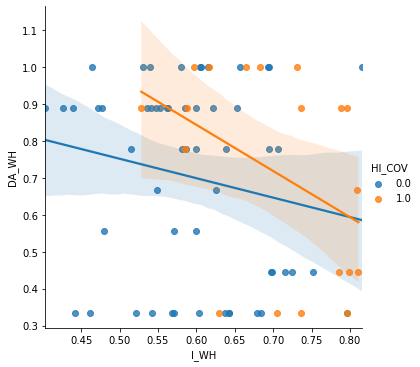

In [103]:
sns.lmplot(data=df_gen_in, x="I_WH", y="DA_WH", hue='HI_COV')

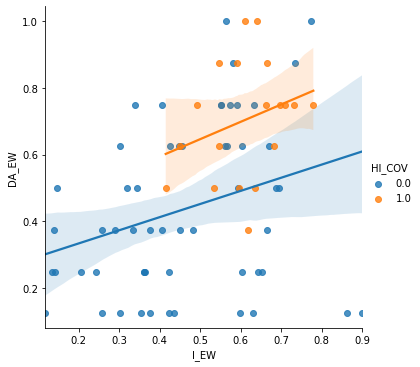

In [104]:
sns.lmplot(data=df_gen_in, x="I_EW", y="DA_EW", hue='HI_COV')

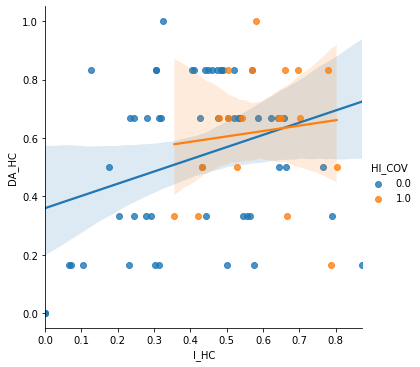

In [105]:
sns.lmplot(data=df_gen_in, x="I_HC", y="DA_HC", hue='HI_COV')

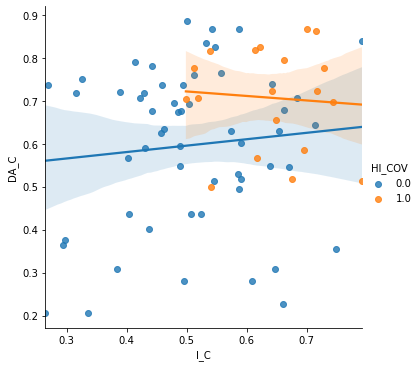

In [106]:
sns.lmplot(data=df_gen_in, x="I_C", y="DA_C", hue='HI_COV')

We'll also take a closer look at the countries identified by Buvinic, Noe, and Swanson (2020) to be in an economic or health crisis with high scoring vulnerabilities for women.

Economic crisis (cluster 1): 
- Afghanistan
- Angola
- Congo, Rep.
- Zimbabwe

Health crisis (cluster 2):
- Bangladesh